In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import joblib 

warnings.filterwarnings('ignore')

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [53]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [54]:
df.shape

(545, 13)

In [55]:
df.count

<bound method DataFrame.count of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       n

In [56]:

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [57]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [58]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)

In [59]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [60]:
df['furnishingstatus']

0      2
1      2
2      1
3      2
4      2
      ..
540    0
541    1
542    0
543    2
544    0
Name: furnishingstatus, Length: 545, dtype: int64

In [61]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4


In [62]:
df['price_per_sqft'] = df['price'] / df['area']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570


In [63]:
df['is_luxury'] = df['area'].apply(lambda x: 1 if x > 3000 else 0)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft,is_luxury
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570,0


In [64]:
amenity_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df['amenity_score'] = df[amenity_cols].sum(axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft,is_luxury,amenity_score
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500,1,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679,1,3
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667,1,4
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414,1,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570,0,0


In [65]:
df['area_furnish'] = df['area'] * df['furnishingstatus']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft,is_luxury,amenity_score,area_furnish
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830,1,3,14840
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500,1,2,17920
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679,1,3,9960
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667,1,4,15000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849,1,4,14840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500,0,0,2400
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414,1,1,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570,0,0,5820


In [66]:
df['area_category'] = pd.cut(df['area'], bins=[0, 1500, 3000, df['area'].max()],
                             labels=['Small', 'Medium', 'Large'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft,is_luxury,amenity_score,area_furnish,area_category
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830,1,3,14840,Large
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500,1,2,17920,Large
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679,1,3,9960,Large
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667,1,4,15000,Large
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849,1,4,14840,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667,0,2,0,Medium
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500,0,0,2400,Medium
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414,1,1,0,Large
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570,0,0,5820,Medium


In [67]:
df['area_category'] = df['area_category'].map({'Small': 0, 'Medium': 1, 'Large': 2})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft,is_luxury,amenity_score,area_furnish,area_category
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1792.452830,1,3,14840,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1367.187500,1,2,17920,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1229.919679,1,3,9960,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1628.666667,1,4,15000,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1537.735849,1,4,14840,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,3,606.666667,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,4,736.312500,0,0,2400,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,3,483.425414,1,1,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,4,601.374570,0,0,5820,1


<Axes: xlabel='furnishingstatus', ylabel='price'>

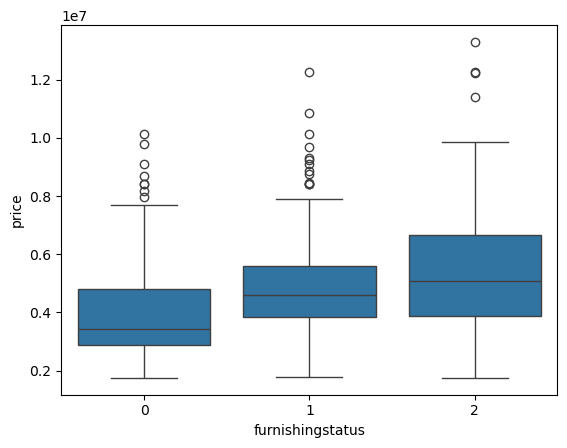

In [68]:

sns.boxplot(x= df['furnishingstatus'],y=df['price'])

<Axes: xlabel='area', ylabel='price'>

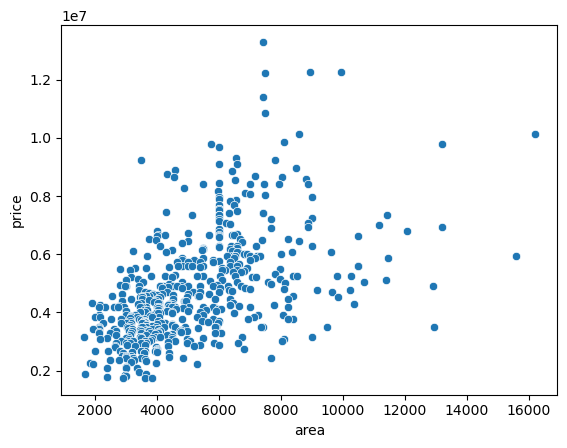

In [69]:
sns.scatterplot(x=df['area'],y= df['price'])

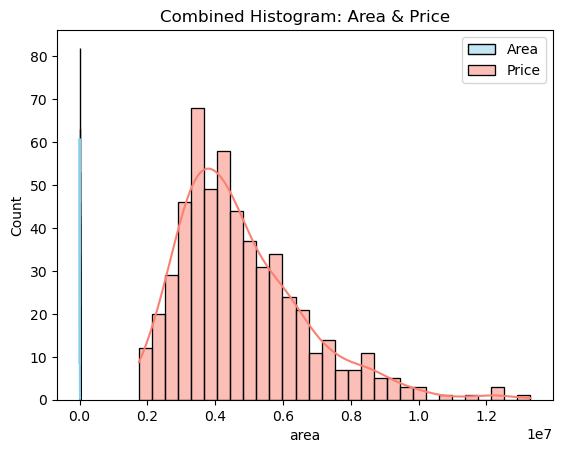

In [70]:
sns.histplot(data=df, x='area', color='skyblue', label='Area', kde=True, bins=30)
sns.histplot(data=df, x='price', color='salmon', label='Price', kde=True, bins=30)
plt.legend()
plt.title("Combined Histogram: Area & Price")
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


x = df.drop(['price'], axis =1 )
y =df['price']


x_train, x_test,y_train,y_test  = train_test_split(x,y, test_size = 0.2, random_state = 42)

scaler =  StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [72]:
df.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad               int64
guestroom              int64
basement               int64
hotwaterheating        int64
airconditioning        int64
parking                int64
prefarea               int64
furnishingstatus       int64
total_rooms            int64
price_per_sqft       float64
is_luxury              int64
amenity_score          int64
area_furnish           int64
area_category       category
dtype: object

In [73]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [74]:
y_pred = model.predict(x_test_scaled)
y_pred

array([ 4237133.23285331,  6731612.38120334,  3449361.66094595,
        5945419.90962107,  2565529.46848473,  4162213.39459884,
        5581001.70432846,  5023841.50830367,  2752604.49239114,
        2526976.90311043,  9151188.52238697,  2524247.65411303,
        3702814.55489585,  3676580.9468714 ,  2294043.20111954,
        3819154.10457996,  2706014.32324529,  6294798.26643568,
        3079382.04496155,  2908903.63721272,  6693713.85489756,
        5482115.96574304,  1784193.27991639,  5791114.14614481,
        4499951.21574496,  8951484.40363493,  3506273.82563907,
        5242610.78636474,  9317352.00418193,  1355102.29600793,
        7634952.72486937,  3972162.90441663,  6691470.9557842 ,
        3261471.04559946,  3160532.94031306,  4833732.87937979,
        4798228.05383229,  4040116.96643392,  3952639.78645062,
        1705115.41742222,  4946486.72868983,  4063174.06400762,
        6730651.71570554,  4650031.4349085 ,  3288307.5095688 ,
        4367640.86046532,  6521619.89653

In [75]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 557204853450.6926


In [76]:
r2_score(y_test,y_pred)

0.8897621704135998

In [77]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.05)
model.fit(x_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [78]:
y_pred = model.predict(x_test_scaled)
y_pred

array([ 3910122.5,  6865606. ,  3713361.8,  6143450. ,  2754408.2,
        4954582.5,  4691601. ,  4586443. ,  2401532.8,  3608880.5,
        9281364. ,  2658787.5,  3364643.8,  3256809.2,  2328885.2,
        2564568. ,  2821880.5,  7242874.5,  3228263.5,  2998444.2,
        6403601.5,  5332266. ,  1832430.8,  5057141.5,  4197982.5,
        9946498. ,  3130475.5,  5244622. ,  7454356. ,  2540208. ,
        6285502.5,  3650767.8,  6688249. ,  2840940.5,  3264913.2,
        4254236. ,  4846958. ,  3205804.5,  3521740.2,  2686226.8,
        5331770.5,  3612125.5,  6844250.5,  4812779. ,  3278349.8,
        4185749.8,  6573768.5,  5441531. ,  2794199. ,  2054881.5,
        8531703. ,  2499040. ,  4256791.5,  4032272.8,  3334349.8,
        2107842.5,  7976579. ,  2183255.8,  4408472. ,  3071403. ,
        3875974.2,  3679710.8,  5006964.5,  3265423.8,  4534972. ,
        6143523. ,  6857097. ,  4919346.5,  4452039.5,  6022941. ,
        3913656.5,  5555744. ,  3814756. ,  6873563. ,  346386

In [79]:
r2_score(y_test, y_pred)

0.9476674795150757

In [80]:
 mean_squared_error(y_test, y_pred)

264518303744.0

In [81]:
mean_absolute_error(y_test, y_pred)

278790.78125

In [87]:
joblib.dump(model,"xgboost_model.pkl")

['xgboost_model.pkl']

In [82]:
model = RandomForestRegressor()
model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [83]:
y_pred = model.predict(x_test_scaled)
y_pred

array([ 3897950. ,  6813129.4,  3718120. ,  6089720. ,  2819103. ,
        4796120. ,  4863040. ,  4639950. ,  2479361.5,  3577084. ,
        8958227.6,  2620450. ,  3325070. ,  3334100. ,  2280250. ,
        2571443. ,  3060995. ,  7353920. ,  3327240. ,  3355940. ,
        6496105. ,  5536265. ,  1981350. ,  4731230. ,  4363310. ,
        9225440. ,  3179400. ,  5103280. ,  6831300. ,  2739940. ,
        6723255. ,  3570420. ,  6746600. ,  3548370. ,  3322620. ,
        4247250. ,  4933320. ,  3318630. ,  3438470. ,  2717470. ,
        4872490. ,  3642800. ,  6805108.8,  4932900. ,  3396540. ,
        4055800. ,  6705090. ,  5484500. ,  2976190. ,  2063211.5,
        8088525.2,  2635430. ,  4191600. ,  4074770. ,  3335430. ,
        2036923. ,  7949060. ,  2532530. ,  4450530. ,  3081330. ,
        3911670. ,  3709370. ,  4712190. ,  3251535. ,  4480490. ,
        5901665. ,  6749260. ,  4694620. ,  4310810. ,  6092310. ,
        3882693.5,  5547360. ,  3958500. ,  6611150. ,  344612

In [84]:
r2_score(y_test, y_pred)

0.9317177979498547

In [85]:
mean_squared_error(y_test, y_pred)

345137186838.588

In [88]:
mean_absolute_error(y_test, y_pred)

300087.25779816514

## this is code genrrate from the chatgpt for the deployment usage 


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import joblib

# =========================
# 1. LOAD DATA
# =========================
df = pd.read_csv("Housing.csv")

# Make column names clean
df.columns = df.columns.str.lower().str.strip()

# Strip spaces inside string values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Expected columns (standard Housing.csv)
# ['price','area','bedrooms','bathrooms','stories','mainroad','guestroom',
#  'basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

# =========================
# 2. BASIC ENCODING
# =========================
# Map yes/no to 1/0
bin_map = {"yes": 1, "no": 0}

for col in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    df[col] = df[col].map(bin_map)

# Map furnishing status
furn_map = {
    "unfurnished": 0,
    "semi-furnished": 1,
    "furnished": 2
}
df["furnishing_code"] = df["furnishingstatus"].map(furn_map)

# Drop rows with any missing after mapping
df.dropna(subset=[
    "price", "area", "bedrooms", "bathrooms",
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning", "prefarea",
    "furnishing_code"
], inplace=True)

# =========================
# 3. FEATURE ENGINEERING (MATCHES YOUR STREAMLIT APP LOGIC)
# =========================
def make_features(df_row: pd.DataFrame) -> pd.DataFrame:
    """Build same 18 features as used in app UI."""
    area = df_row["area"]
    bedrooms = df_row["bedrooms"]
    bathrooms = df_row["bathrooms"]
    mainroad = df_row["mainroad"]
    guestroom = df_row["guestroom"]
    basement = df_row["basement"]
    hotwater = df_row["hotwaterheating"]
    ac = df_row["airconditioning"]
    prefarea = df_row["prefarea"]
    furn = df_row["furnishing_code"]

    total_rooms = bedrooms + bathrooms + guestroom
    is_luxury = (area > 3000).astype(int)
    amenity_score = mainroad + guestroom + basement + hotwater + ac + prefarea
    area_furn = area * furn
    area_bucket = np.where(area <= 1500, 0,
                    np.where(area <= 3000, 1, 2))
    bedrooms_sq = bedrooms ** 2
    log_area = np.log1p(area)

    feat_df = pd.DataFrame({
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwater": hotwater,
        "ac": ac,
        "prefarea": prefarea,
        "furnishing": furn,
        "total_rooms": total_rooms,
        "const_zero": 0,  # same as your old X[11] = 0
        "is_luxury": is_luxury,
        "amenity_score": amenity_score,
        "area_furn": area_furn,
        "area_bucket": area_bucket,
        "bedrooms_sq": bedrooms_sq,
        "log_area": log_area,
    })
    return feat_df

X = make_features(df)
y = df["price"]

print("✅ Data Ready:", X.shape[0], "rows,", X.shape[1], "features")

# =========================
# 4. TRAIN-TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train), " | Test size:", len(X_test))

# =========================
# 5. FULL PIPELINE (SCALER + XGBOOST)
# =========================
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="reg:squarederror"
    ))
])

pipeline.fit(X_train, y_train)

# Optional: quick score
print("Train R²:", pipeline.score(X_train, y_train))
print("Test  R²:", pipeline.score(X_test, y_test))

# =========================
# 6. SAVE PIPELINE
# =========================
joblib.dump(pipeline, "xgboost_pipeline.pkl")
print("🎯 Saved: xgboost_pipeline.pkl")


✅ Data Ready: 545 rows, 18 features
Train size: 436  | Test size: 109
Train R²: 0.9890863299369812
Test  R²: 0.5973792672157288
🎯 Saved: xgboost_pipeline.pkl
